## SECTION B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
import struct

def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows * cols)
    return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

train_images = load_images("MNIST/train-images.idx3-ubyte")
train_labels = load_labels("MNIST/train-labels.idx1-ubyte")
test_images = load_images("MNIST/t10k-images.idx3-ubyte")
test_labels = load_labels("MNIST/t10k-labels.idx1-ubyte")

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images_df = pd.DataFrame(train_images)
train_labels_df = pd.DataFrame(train_labels)
test_images_df = pd.DataFrame(test_images)
test_labels_df = pd.DataFrame(test_labels)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
train_images_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_images_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_images_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

In [7]:
test_images_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

In [8]:
print(train_images_df.info())
print(test_images_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 7.5 MB
None


In [9]:
print(train_labels_df[0].unique())
print(test_labels_df[0].unique())

[5 0 4 1 9 2 3 6 7 8]
[7 2 1 0 4 9 5 6 3 8]


The images belong to 10 unique categories.

In [10]:
X_train = train_images
y_train = train_labels
X_test = test_images
y_test = test_labels

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


<h3 align='center'>Part 1, 2 & 3</h3>

In [11]:
# array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
# print(array.shape)
# b = np.array([1, 2, 3, 4, 5]).reshape(5, 1) 
# print(b.shape)
# c = array + b # broadcasting
# print(c.shape)
# c

In [ ]:
class NeuralNetwork:
    def __init__(self, N, hidden_layers, learning_rate, activation, weight_init, epochs, batch_size, input_dim, classes):
        self.N = N
        self.hidden_layers = hidden_layers
        self.learning_rate = learning_rate
        self.activation = activation
        self.weight_init = weight_init
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights = []
        self.biases = []
        self.input_dim = input_dim # 784
        self.input_dim_copy = input_dim
        self.classes = classes # 10

        # weights = [256X784, 128X256, 64X128, 32X64, 10X32]
        # biases = [256X1, 128X1, 64X1, 32X1, 10X1]
        for i in range(self.N):
            self.weights.append(self.initialize_weights(self.hidden_layers[i], self.input_dim_copy))
            self.biases.append(self.initialize_weights(self.hidden_layers[i], 1))
            self.input_dim_copy = self.hidden_layers[i]
        self.weights.append(self.initialize_weights(self.classes, self.hidden_layers[-1]))
        self.biases.append(np.zeros((self.classes, 1)))     

        # for i in range(len(self.weights)):
        #     print(f'Layer {i+1} : {self.weights[i].shape} {self.biases[i].shape}')  

        self.initialize_activations()
    
    # Activation functions and their derivatives
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        sig = self.sigmoid(z)
        return sig * (1-sig)

    def tanh(self, z):
        return np.tanh(z)

    def tanh_derivative(self, z):
        return 1 - np.tanh(z)**2
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def relu_derivative(self, z):
        return np.where(z>0, 1, 0)

    def leaky_relu(self, z, alpha=0.01):
        return np.where(z>0, z, alpha * z)
    
    def leaky_relu_derivative(self, z, alpha=0.01):
        return np.where(z>0, 1, alpha)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True)) 
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)
    
    def initialize_activations(self):
        if self.activation == 'sigmoid':
            self.activation_func = self.sigmoid
            self.activation_derivative = self.sigmoid_derivative
        elif self.activation == 'relu':
            self.activation_func = self.relu
            self.activation_derivative = self.relu_derivative
        elif self.activation == 'tanh':
            self.activation_func = self.tanh
            self.activation_derivative = self.tanh_derivative
        elif self.activation == 'leaky_relu':
            self.activation_func = self.leaky_relu
            self.activation_derivative = self.leaky_relu_derivative
        
        
    # Weight initialization functions
    def zero_init(self, input_dim, output_dim):
        return np.zeros((input_dim, output_dim))

    def random_init(self, input_dim, output_dim):
        return np.random.rand(input_dim, output_dim) * 0.01

    def normal_init(self, input_dim, output_dim):
        return np.random.randn(input_dim, output_dim) * np.sqrt(2/input_dim)
    
    def initialize_weights(self, input_dim, output_dim):
        if self.weight_init == 'zero':
            return self.zero_init(input_dim, output_dim)
        elif self.weight_init == 'random':
            return self.random_init(input_dim, output_dim)
        elif self.weight_init == 'normal':
            return self.normal_init(input_dim, output_dim)
        
        
    def cross_entropy(self, y_pred, y_true):
        m = y_true.shape[0]
        y_one_hot = np.zeros((self.classes, m))
        y_one_hot[y_true, np.arange(m)] = 1
        epsilon = 1e-10
        return -np.sum(y_one_hot * np.log(y_pred + epsilon)) / m
        
    def forward_pass(self, X):
        neuron_outputs = [X]
        # for i in range(len(neuron_outputs)):
        #     print(neuron_outputs[i].shape)
        neuron_inputs = []
        for i in range(self.N+1):
            Z = np.dot(self.weights[i], neuron_outputs[i]) + self.biases[i]
            neuron_inputs.append(Z)
            if i<self.N:
                A = self.activation_func(Z)
            else:
                A = self.softmax(Z)
            neuron_outputs.append(A)

        # print(len(neuron_outputs), len(neuron_inputs))
        # for i in range(len(neuron_outputs)):
        #     print(neuron_outputs[i].shape)
        # for i in range(len(neuron_inputs)):
        #     print(neuron_inputs[i].shape)

        return neuron_outputs, neuron_inputs
    
    def backward_propagation(self, neuron_outputs, neuron_inputs, y):
        m = y.shape[0]
        y_one_hot = np.zeros((self.classes, m))
        y_one_hot[y, np.arange(m)] = 1
        # print(y_one_hot.shape)
        # print(y_one_hot)
        dA = neuron_outputs[-1] - y_one_hot
        dW, db = [], []
        for i in range(self.N, -1, -1):
            if i==self.N:
                dZ = dA
            else:
                dZ = dA * self.activation_derivative(neuron_inputs[i])
            dW.insert(0, np.dot(dZ, neuron_outputs[i].T) / m)
            db.insert(0, np.sum(dZ, axis=1, keepdims=True) / m)
            dA = np.dot(self.weights[i].T, dZ)

        # for i in range(len(dW)):
        #    print(dW[i].shape, db[i].shape) 
           
        return dW, db

    def update_weights(self, dw, db):
        # print(len(dw), len(db))
        # print(len(self.weights), len(self.biases))
        for i in range(self.N+1):
            self.weights[i] -= self.learning_rate * dw[i]
            self.biases[i] -= self.learning_rate * db[i]

    def fit(self, X, y, X_val=None, y_val=None, early_stopping=False, max_threshold=10):
        m = X.shape[0]
        best_val_loss = float('inf')
        cnt = 0
        for epoch in range(self.epochs):
            perm = np.random.permutation(m)  # shuffling the data
            X_shuffled = X[perm, :]  
            y_shuffled = y[perm]
            for i in range(0, m, self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size, :]
                y_batch = y_shuffled[i:i + self.batch_size]
                neuron_outputs, neuron_inputs = self.forward_pass(X_batch.T)
                dW, db = self.backward_propagation(neuron_outputs, neuron_inputs, y_batch.T)
                self.update_weights(dW, db)
            
            if early_stopping and X_val is not None and y_val is not None:
                val_loss = self.cross_entropy(self.predict_proba(X_val.T), y_val.T)
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    cnt = 0
                else:
                    cnt += 1

                if cnt >= max_threshold:
                    print(f'Early stopping at epoch {epoch}')
                    break

            if epoch % 10 == 0:
                print(f'Epoch {epoch} : done')

    def partial_fit(self, X, y):
        m = X.shape[0]
        perm = np.random.permutation(m) # shuffling the data
        X_shuffled = X[perm, :]
        y_shuffled = y[perm]
        for i in range(0, m, self.batch_size):
            X_batch = X_shuffled[i:i + self.batch_size, :]
            y_batch = y_shuffled[i:i + self.batch_size]
            neuron_outputs, neuron_inputs = self.forward_pass(X_batch.T)
            dW, db = self.backward_propagation(neuron_outputs, neuron_inputs, y_batch.T)
            self.update_weights(dW, db)

    def training(self, X_train, y_train, X_val, y_val, early_stopping=False, max_threshold=10):
        best_val_loss = float('inf')
        training_loss = []
        validation_loss = []
        cnt = 0 
        # print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

        for epoch in range(self.epochs):
            self.partial_fit(X_train, y_train)

            train_loss = self.cross_entropy(self.predict_proba(X_train), y_train)
            val_loss = self.cross_entropy(self.predict_proba(X_val), y_val)

            training_loss.append(train_loss)
            validation_loss.append(val_loss)

            # Check for early stopping
            if early_stopping and X_val is not None and y_val is not None:
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    cnt = 0
                else:
                    cnt += 1

                if cnt >= max_threshold:
                    print(f'Early stopping at epoch {epoch}')
                    break

            if epoch % 10 == 0:
                print(f'Epoch {epoch} : done')

        return training_loss, validation_loss

    def predict(self, X):
        neuron_outputs, _ = self.forward_pass(X.T)
        # print(neuron_outputs[-1].shape)
        return np.argmax(neuron_outputs[-1], axis=0)
    
    def predict_proba(self, X):
        neuron_outputs, _ = self.forward_pass(X.T)
        # print(neuron_outputs[-1].shape)
        # print(neuron_outputs[-1])
        return neuron_outputs[-1]
    
    def score(self, X, y):
        y_pred = self.predict(X)
        # print(y_pred.shape, y.shape)
        return np.mean(y_pred == y)


<h3 align='center'>Part 4</h3>

In [13]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
X = X / 255

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(7000, 784)
(7000,)
(7000, 784)
(7000,)


Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for relu activation and random initialization : 0.04213067715470709
Validation loss for relu activation and random initialization : 0.3876113905517923
Test accuracy for relu activation and random initialization : 0.9415714285714286


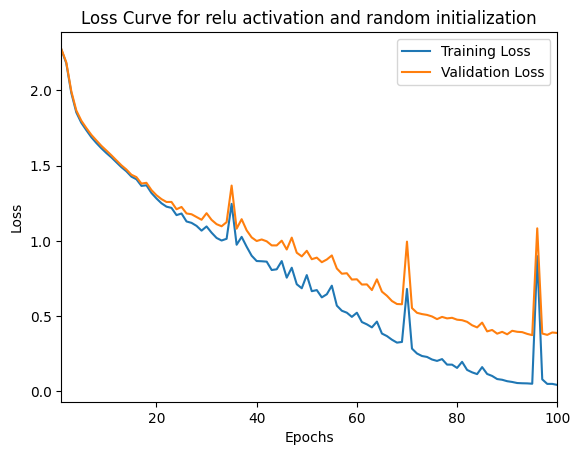

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for relu activation and normal initialization : 0.0007391536140518287
Validation loss for relu activation and normal initialization : 0.16123511698312015
Test accuracy for relu activation and normal initialization : 0.9725714285714285


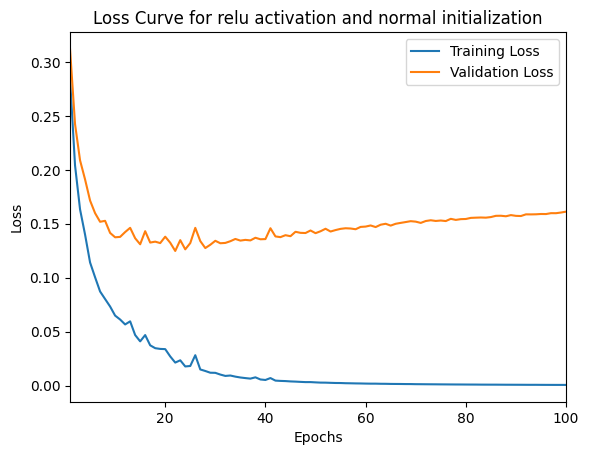

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for relu activation and zero initialization : 2.3012257240026384
Validation loss for relu activation and zero initialization : 2.301173062483164
Test accuracy for relu activation and zero initialization : 0.11714285714285715


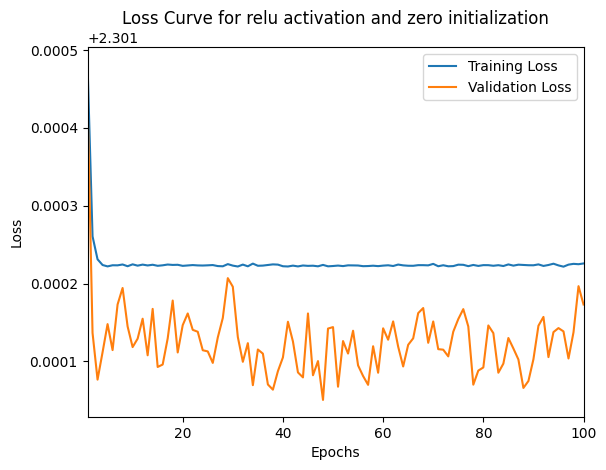

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for sigmoid activation and random initialization : 2.3016867128058824
Validation loss for sigmoid activation and random initialization : 2.3010176933005417
Test accuracy for sigmoid activation and random initialization : 0.11714285714285715


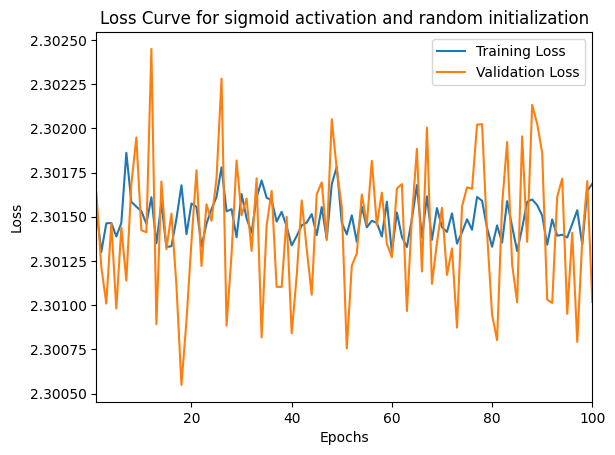

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for sigmoid activation and normal initialization : 0.16296898396090326
Validation loss for sigmoid activation and normal initialization : 0.19603802731380074
Test accuracy for sigmoid activation and normal initialization : 0.9511428571428572


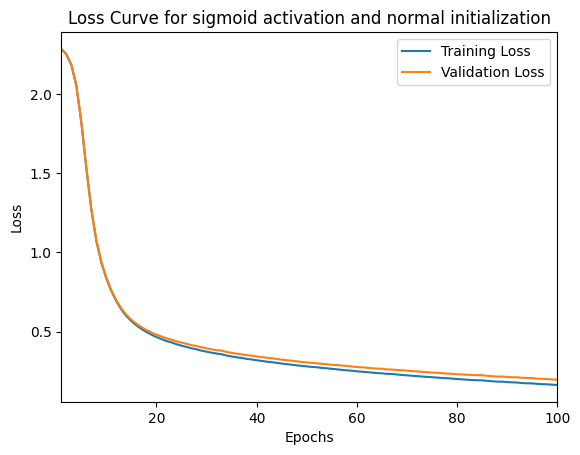

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for sigmoid activation and zero initialization : 2.301296812314406
Validation loss for sigmoid activation and zero initialization : 2.30145579838704
Test accuracy for sigmoid activation and zero initialization : 0.11714285714285715


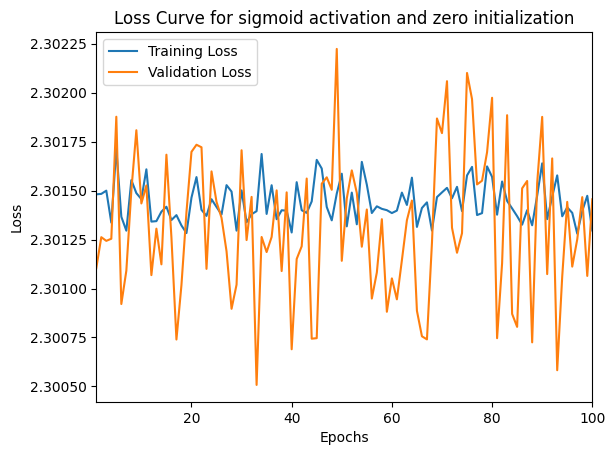

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for tanh activation and random initialization : 0.0661305116843234
Validation loss for tanh activation and random initialization : 0.20213931194650603
Test accuracy for tanh activation and random initialization : 0.9542857142857143


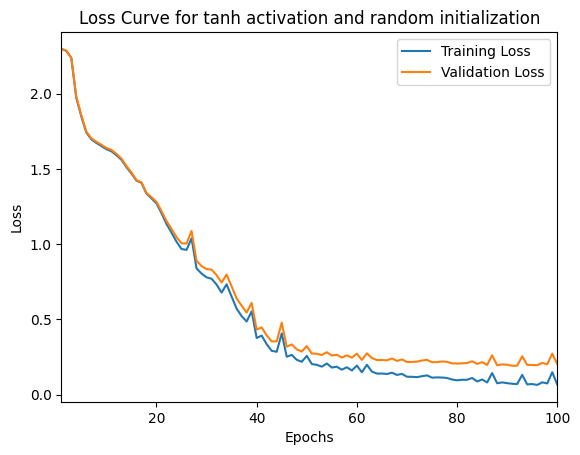

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for tanh activation and normal initialization : 0.0029690640560436385
Validation loss for tanh activation and normal initialization : 0.11669023832503721
Test accuracy for tanh activation and normal initialization : 0.9732857142857143


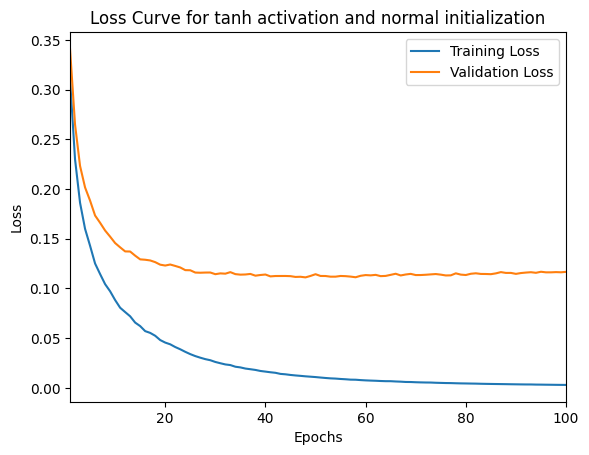

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for tanh activation and zero initialization : 2.3012234383535666
Validation loss for tanh activation and zero initialization : 2.3011364434070147
Test accuracy for tanh activation and zero initialization : 0.11714285714285715


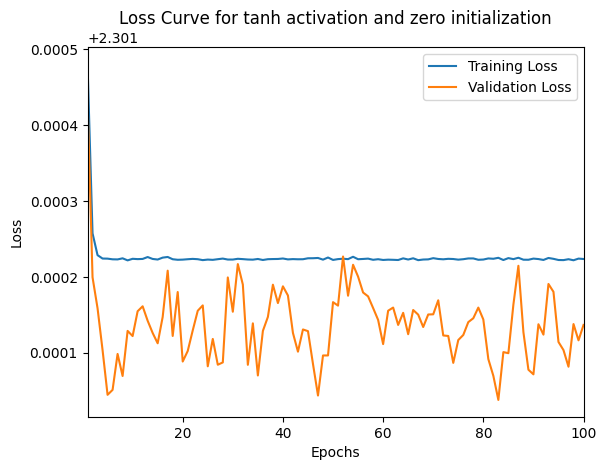

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for leaky_relu activation and random initialization : 0.053014415202387276
Validation loss for leaky_relu activation and random initialization : 0.4037509762057915
Test accuracy for leaky_relu activation and random initialization : 0.946


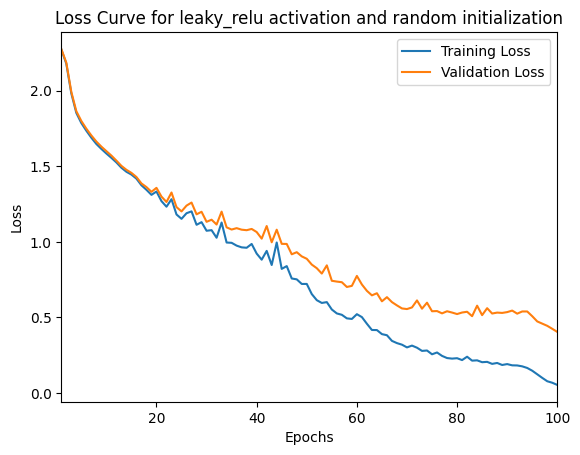

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for leaky_relu activation and normal initialization : 0.0007124560258733918
Validation loss for leaky_relu activation and normal initialization : 0.15766890799082792
Test accuracy for leaky_relu activation and normal initialization : 0.9702857142857143


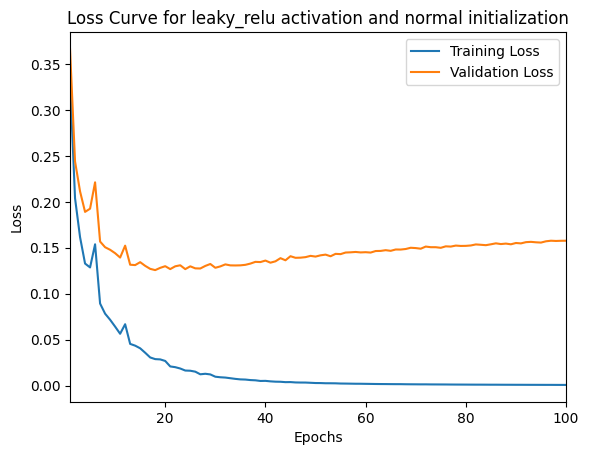

Epoch 0 : done
Epoch 10 : done
Epoch 20 : done
Epoch 30 : done
Epoch 40 : done
Epoch 50 : done
Epoch 60 : done
Epoch 70 : done
Epoch 80 : done
Epoch 90 : done
Training loss for leaky_relu activation and zero initialization : 2.3012218152554187
Validation loss for leaky_relu activation and zero initialization : 2.3011572296882323
Test accuracy for leaky_relu activation and zero initialization : 0.11714285714285715


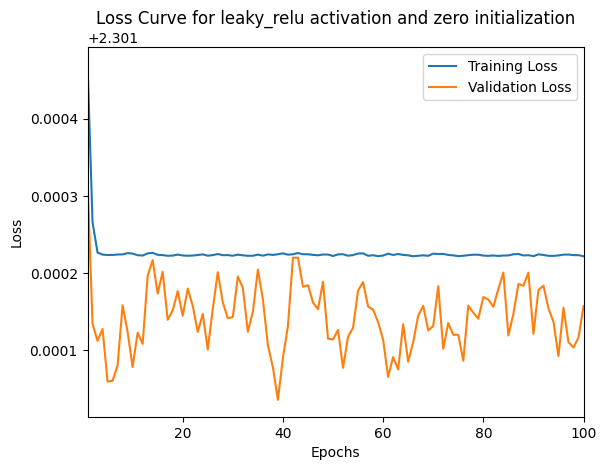

In [16]:
import pickle

activations = ['relu', 'sigmoid', 'tanh', 'leaky_relu']
weight_initializations = ['random', 'normal', 'zero']

for activation in activations:
    for weight_init in weight_initializations:
        model = NeuralNetwork(
            N=4,  # 4 hidden layers
            hidden_layers=[256, 128, 64, 32],  # hidden layer sizes only
            learning_rate=0.02,
            activation=activation,
            weight_init=weight_init,
            epochs=100,
            batch_size=128,
            input_dim=784,
            classes=10
        )

        training_loss = []
        validation_loss = []

        training_loss, validation_loss = model.training(X_train, y_train, X_val, y_val)
        print(f'Training loss for {activation} activation and {weight_init} initialization : {training_loss[-1]}')
        print(f'Validation loss for {activation} activation and {weight_init} initialization : {validation_loss[-1]}')

        test_accuracy = model.score(X_test, y_test)
        print(f'Test accuracy for {activation} activation and {weight_init} initialization : {test_accuracy}')

        with open(f'model_{activation}_{weight_init}.pkl', 'wb') as f:
            pickle.dump(model, f)

        plt.figure()
        plt.plot(range(1, model.epochs + 1), training_loss, label="Training Loss")
        plt.plot(range(1, model.epochs + 1), validation_loss, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Loss Curve for {activation} activation and {weight_init} initialization")
        plt.legend()

        plt.xlim(1, model.epochs)
        plt.show()


In [17]:
# testing the model with best accuracy
with open('model_tanh_normal.pkl', 'rb') as f:
    model = pickle.load(f)

test_accuracy = model.score(X_test, y_test)
print(f'Test accuracy for relu activation and random initialization : {test_accuracy}')

Test accuracy for relu activation and random initialization : 0.9732857142857143


In [19]:
with open('model_sigmoid_zero.pkl', 'rb') as f:
    model = pickle.load(f)

test_accuracy = model.score(X_test, y_test)
print(f'Test accuracy for relu activation and random initialization : {test_accuracy}')

Test accuracy for relu activation and random initialization : 0.11714285714285715
